# **🛠️ Preparação dos Dados**

In [1]:
from google.colab import files
uploaded = files.upload()


Saving telecomx_tratado.csv to telecomx_tratado.csv


In [3]:
import pandas as pd

# 📌 Carregar o arquivo enviado
df = pd.read_csv("telecomx_tratado.csv")

# 📌 Ver tamanho e primeiras linhas
print("Dimensão do dataset:", df.shape)
df.head()


Dimensão do dataset: (7043, 22)


,customerID,Churn,Evasao,Genero,Idoso,Possui_Conjuge,Possui_Dependentes,Tempo_Contrato,Telefone_Ativo,Multiplas_Linhas,...,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Papel,Metodo_Pagamento,Fatura_Mensal,Fatura_Total
0,0002-ORFBO,No,0,Female,0,1,1,9,1,0,...,1,0,1,1,0,One year,1,Mailed check,65.6,593.30
1,0003-MKNFE,No,0,Male,0,0,0,9,1,1,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,1,Male,0,0,0,4,1,0,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,1,Male,1,1,0,13,1,0,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,1,Female,1,1,0,3,1,0,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40


In [4]:
# 📌 Remover colunas que não ajudam na previsão
colunas_para_remover = ['customerID']  # liste aqui outras colunas se necessário
df = df.drop(columns=colunas_para_remover, errors='ignore')

print("Colunas restantes:", df.columns.tolist())


Colunas restantes: ['Churn', 'Evasao', 'Genero', 'Idoso', 'Possui_Conjuge', 'Possui_Dependentes', 'Tempo_Contrato', 'Telefone_Ativo', 'Multiplas_Linhas', 'Tipo_Internet', 'Seguranca_Online', 'Backup_Online', 'Protecao_Dispositivo', 'Suporte_Tecnico', 'Streaming_TV', 'Streaming_Filmes', 'Tipo_Contrato', 'Fatura_Papel', 'Metodo_Pagamento', 'Fatura_Mensal', 'Fatura_Total']


In [5]:
# 📌 Separar variáveis categóricas e numéricas
variaveis_categoricas = df.select_dtypes(include=['object']).columns
print("Variáveis categóricas:", variaveis_categoricas.tolist())

# 📌 Aplicar One-Hot Encoding
df = pd.get_dummies(df, columns=variaveis_categoricas, drop_first=True)

print("Dimensão após one-hot encoding:", df.shape)
df.head()

Variáveis categóricas: ['Churn', 'Genero', 'Tipo_Internet', 'Tipo_Contrato', 'Metodo_Pagamento']
Dimensão após one-hot encoding: (7043, 25)


,Evasao,Idoso,Possui_Conjuge,Possui_Dependentes,Tempo_Contrato,Telefone_Ativo,Multiplas_Linhas,Seguranca_Online,Backup_Online,Protecao_Dispositivo,...,Fatura_Total,Churn_Yes,Genero_Male,Tipo_Internet_Fiber optic,Tipo_Internet_No,Tipo_Contrato_One year,Tipo_Contrato_Two year,Metodo_Pagamento_Credit card (automatic),Metodo_Pagamento_Electronic check,Metodo_Pagamento_Mailed check
0,0,0,1,1,9,1,0,0,1,0,...,593.30,False,False,False,False,True,False,False,False,True
1,0,0,0,0,9,1,1,0,0,0,...,542.40,False,True,False,False,False,False,False,False,True
2,1,0,0,0,4,1,0,0,0,1,...,280.85,True,True,True,False,False,False,False,True,False
3,1,1,1,0,13,1,0,0,1,1,...,1237.85,True,True,True,False,False,False,False,True,False
4,1,1,1,0,3,1,0,0,0,0,...,267.40,True,False,True,False,False,False,False,False,True


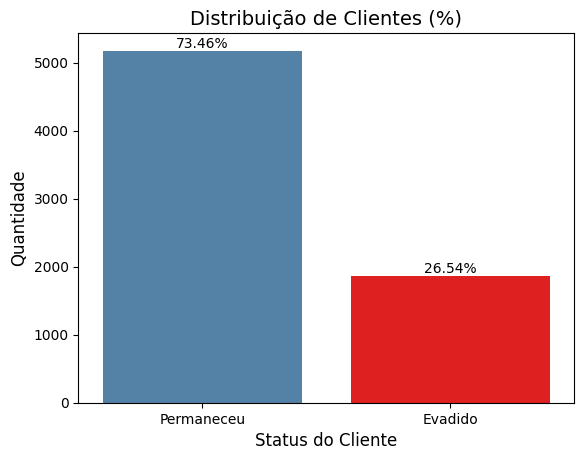

Proporção por classe (%):
Churn_Yes
Permaneceu    73.463013
Evadido       26.536987
Name: proportion, dtype: float64

🔍 Observação: Há um desequilíbrio moderado nas classes.
A classe 'Permaneceu' é majoritária, o que pode impactar o desempenho dos modelos preditivos.
Sugestão: considerar técnicas como oversampling, undersampling ou ajuste de pesos.


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criar uma cópia para mudar os rótulos
df_plot = df.copy()
df_plot['Churn_Yes'] = df_plot['Churn_Yes'].map({False: 'Permaneceu', True: 'Evadido'})

# Calcular proporções
proporcao = df_plot['Churn_Yes'].value_counts(normalize=True) * 100

# Criar gráfico com cores personalizadas (sem FutureWarning)
ax = sns.countplot(
    x='Churn_Yes',
    data=df_plot,
    order=['Permaneceu', 'Evadido'],
    hue='Churn_Yes',
    palette={'Permaneceu': 'steelblue', 'Evadido': 'red'},
    legend=False
)

plt.title("Distribuição de Clientes (%)", fontsize=14)
plt.xlabel("Status do Cliente", fontsize=12)
plt.ylabel("Quantidade", fontsize=12)

# Adicionar rótulos de porcentagem
for p in ax.patches:
    altura = p.get_height()
    percentual = (altura / len(df_plot)) * 100
    ax.annotate(f'{percentual:.2f}%',
                (p.get_x() + p.get_width() / 2., altura),
                ha='center', va='bottom', fontsize=10)

plt.show()

# Mostrar proporções no console
print("Proporção por classe (%):")
print(proporcao)

# Avaliar desequilíbrio
diff = abs(proporcao['Permaneceu'] - proporcao['Evadido'])
if diff > 20:
    print("\n🔍 Observação: Há um desequilíbrio moderado nas classes.")
    print("A classe 'Permaneceu' é majoritária, o que pode impactar o desempenho dos modelos preditivos.")
    print("Sugestão: considerar técnicas como oversampling, undersampling ou ajuste de pesos.")
else:
    print("\n✅ As classes estão balanceadas.")


In [12]:
# Selecionar colunas numéricas
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Ver estatísticas básicas
print("📊 Estatísticas das variáveis numéricas:\n")
display(df[num_cols].describe().T)

# Ver amplitude de cada variável (max - min)
print("\n📏 Amplitude de cada variável:")
print((df[num_cols].max() - df[num_cols].min()).sort_values(ascending=False))


📊 Estatísticas das variáveis numéricas:



,count,mean,std,min,25%,50%,75%,max
Evasao,7043.0,0.265370,0.441561,0.00,0.00,0.00,1.00,1.00
Idoso,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
Possui_Conjuge,7043.0,0.483033,0.499748,0.00,0.00,0.00,1.00,1.00
Possui_Dependentes,7043.0,0.299588,0.458110,0.00,0.00,0.00,1.00,1.00
Tempo_Contrato,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
Telefone_Ativo,7043.0,0.903166,0.295752,0.00,1.00,1.00,1.00,1.00
Multiplas_Linhas,7043.0,0.421837,0.493888,0.00,0.00,0.00,1.00,1.00
Seguranca_Online,7043.0,0.286668,0.452237,0.00,0.00,0.00,1.00,1.00
Backup_Online,7043.0,0.344881,0.475363,0.00,0.00,0.00,1.00,1.00
Protecao_Dispositivo,7043.0,0.343888,0.475038,0.00,0.00,0.00,1.00,1.00



📏 Amplitude de cada variável:
Fatura_Total            8684.8
Fatura_Mensal            100.5
Tempo_Contrato            72.0
Evasao                     1.0
Possui_Dependentes         1.0
Telefone_Ativo             1.0
Possui_Conjuge             1.0
Idoso                      1.0
Seguranca_Online           1.0
Multiplas_Linhas           1.0
Backup_Online              1.0
Protecao_Dispositivo       1.0
Streaming_TV               1.0
Suporte_Tecnico            1.0
Fatura_Papel               1.0
Streaming_Filmes           1.0
dtype: float64


In [16]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Lista de variáveis numéricas contínuas
variaveis_continuas = ['Fatura_Total', 'Fatura_Mensal', 'Tempo_Contrato']

# Separar o dataset em contínuas e binárias
df_continuas = df[variaveis_continuas]
df_binarias = df.drop(columns=variaveis_continuas)

# Escalar apenas as variáveis contínuas
scaler = StandardScaler()
df_continuas_scaled = pd.DataFrame(
    scaler.fit_transform(df_continuas),
    columns=variaveis_continuas
)

# Reunir tudo novamente
df_scaled = pd.concat([df_continuas_scaled, df_binarias], axis=1)

print("✅ Normalização concluída!")
df_scaled.head()


✅ Normalização concluída!


,Fatura_Total,Fatura_Mensal,Tempo_Contrato,Evasao,Idoso,Possui_Conjuge,Possui_Dependentes,Telefone_Ativo,Multiplas_Linhas,Seguranca_Online,...,Fatura_Papel,Churn_Yes,Genero_Male,Tipo_Internet_Fiber optic,Tipo_Internet_No,Tipo_Contrato_One year,Tipo_Contrato_Two year,Metodo_Pagamento_Credit card (automatic),Metodo_Pagamento_Electronic check,Metodo_Pagamento_Mailed check
0,-0.744026,0.027862,-0.951682,0,0,1,1,1,0,0,...,1,False,False,False,False,True,False,False,False,True
1,-0.766482,-0.161583,-0.951682,0,0,0,0,1,1,0,...,0,False,True,False,False,False,False,False,False,True
2,-0.881874,0.303720,-1.155283,1,0,0,0,1,0,0,...,1,True,True,True,False,False,False,False,True,False
3,-0.459662,1.104706,-0.788800,1,1,1,0,1,0,0,...,1,True,True,True,False,False,False,False,True,False
4,-0.887808,0.636080,-1.196004,1,1,1,0,1,0,0,...,1,True,False,True,False,False,False,False,False,True


# **🎯 Correlação e Seleção de Variáveis**

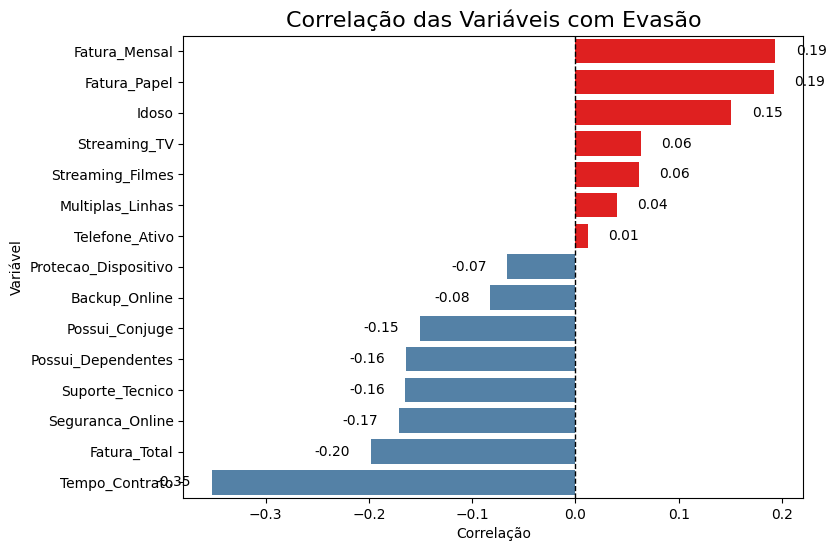

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionar apenas variáveis numéricas
num_cols = df.select_dtypes(include=['int64', 'float64'])

# Calcular matriz de correlação
corr_matrix = num_cols.corr()

# Filtrar correlações apenas com Evasao (removendo ela mesma)
corr_evasao = corr_matrix[['Evasao']].drop(index='Evasao').sort_values(by='Evasao', ascending=False)

# Criar cores: vermelho para correlação positiva, azul para negativa
colors = ['red' if val > 0 else 'steelblue' for val in corr_evasao['Evasao']]

# Criar gráfico sem FutureWarning
plt.figure(figsize=(8,6))
ax = sns.barplot(
    x=corr_evasao['Evasao'],
    y=corr_evasao.index,
    hue=corr_evasao.index,     # truque para evitar warning
    dodge=False,
    palette=colors,
    legend=False
)

# Linha no zero
plt.axvline(0, color='black', linestyle='--', linewidth=1)

# Adicionar valores de correlação nas barras
for i, valor in enumerate(corr_evasao['Evasao']):
    plt.text(
        x=valor + (0.02 if valor > 0 else -0.02),
        y=i,
        s=f"{valor:.2f}",
        va='center',
        ha='left' if valor > 0 else 'right',
        fontsize=10,
        color='black'
    )

plt.title("Correlação das Variáveis com Evasão", fontsize=16)
plt.xlabel("Correlação")
plt.ylabel("Variável")
plt.show()


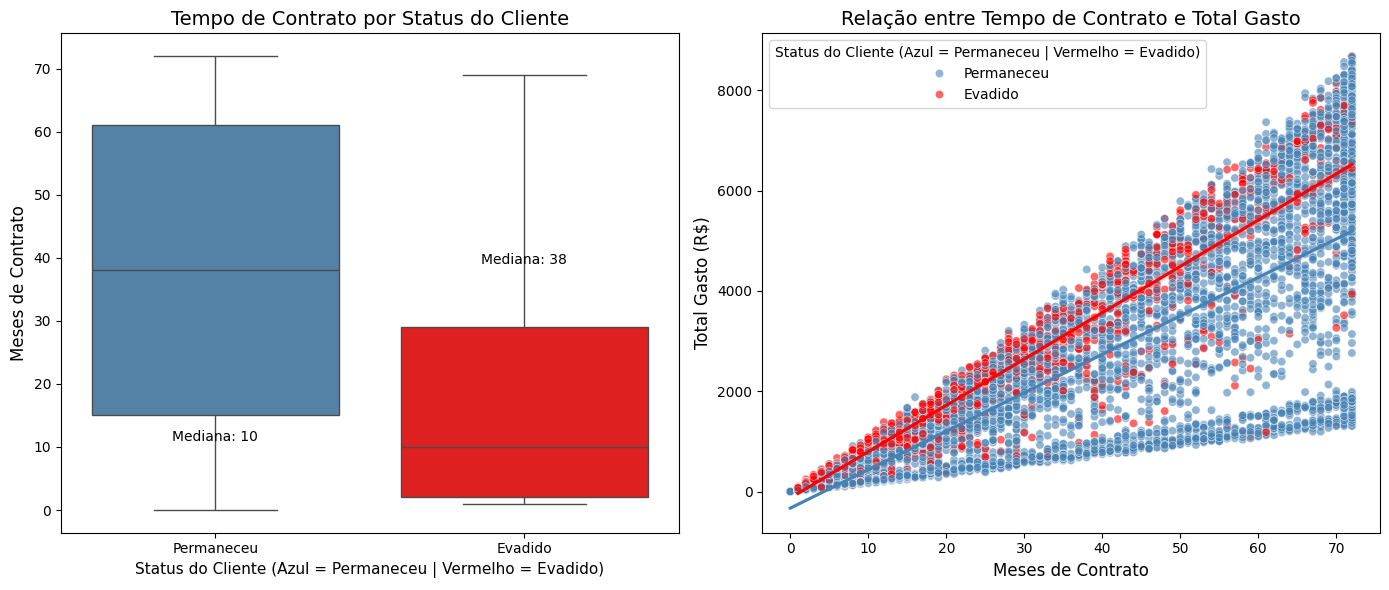

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suprimir avisos desnecessários
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Criar cópia com rótulos descritivos
df_plot = df.copy()
df_plot['Evasao'] = df_plot['Evasao'].map({0: 'Permaneceu', 1: 'Evadido'})

plt.figure(figsize=(14,6))

# ---- Boxplot: Tempo de contrato × Evasão ----
plt.subplot(1, 2, 1)
sns.boxplot(
    x='Evasao',
    y='Tempo_Contrato',
    data=df_plot,
    palette={'Permaneceu': 'steelblue', 'Evadido': 'red'},
    showfliers=False
)

# Medianas
medianas = df_plot.groupby('Evasao')['Tempo_Contrato'].median()
for i, med in enumerate(medianas):
    plt.text(i, med + 1, f"Mediana: {med:.0f}", ha='center', color='black', fontsize=10)

plt.title('Tempo de Contrato por Status do Cliente', fontsize=14)
plt.xlabel('Status do Cliente (Azul = Permaneceu | Vermelho = Evadido)', fontsize=11)
plt.ylabel('Meses de Contrato', fontsize=12)

# ---- Scatter com linha de tendência ----
plt.subplot(1, 2, 2)
sns.scatterplot(
    x='Tempo_Contrato',
    y='Fatura_Total',
    hue='Evasao',
    data=df_plot,
    palette={'Permaneceu': 'steelblue', 'Evadido': 'red'},
    alpha=0.6
)

# Linha de tendência
sns.regplot(
    x='Tempo_Contrato',
    y='Fatura_Total',
    data=df_plot[df_plot['Evasao'] == 'Permaneceu'],
    scatter=False, color='steelblue'
)
sns.regplot(
    x='Tempo_Contrato',
    y='Fatura_Total',
    data=df_plot[df_plot['Evasao'] == 'Evadido'],
    scatter=False, color='red'
)

plt.title('Relação entre Tempo de Contrato e Total Gasto', fontsize=14)
plt.xlabel('Meses de Contrato', fontsize=12)
plt.ylabel('Total Gasto (R$)', fontsize=12)
plt.legend(title='Status do Cliente (Azul = Permaneceu | Vermelho = Evadido)')

plt.tight_layout()
plt.show()


# **🤖 Modelagem Preditiva**

In [32]:
from sklearn.model_selection import train_test_split

# Separar variáveis preditoras (X) e alvo (y)
X = df.drop(columns=['Evasao'])  # todas as colunas menos a de saída
y = df['Evasao']                 # variável alvo

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,      # 30% teste
    random_state=42,    # reprodutibilidade
    stratify=y          # mantém a proporção da evasão
)

print("Tamanho treino:", X_train.shape)
print("Tamanho teste:", X_test.shape)
print("Proporção de evasão no treino:", y_train.mean())
print("Proporção de evasão no teste:", y_test.mean())


Tamanho treino: (4930, 24)
Tamanho teste: (2113, 24)
Proporção de evasão no treino: 0.2653144016227181
Proporção de evasão no teste: 0.26549929010885


## **📌  1 – Modelo com normalização: Regressão Logística**


A Regressão Logística é um modelo linear que prevê a probabilidade de evasão.
Ela é sensível à escala dos dados — ou seja, se uma variável tiver valores muito maiores que outra, ela pode dominar o modelo.
Por isso, aplicamos normalização (StandardScaler) apenas nas variáveis numéricas contínuas.

=== Regressão Logística ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1552
           1       1.00      1.00      1.00       561

    accuracy                           1.00      2113
   macro avg       1.00      1.00      1.00      2113
weighted avg       1.00      1.00      1.00      2113



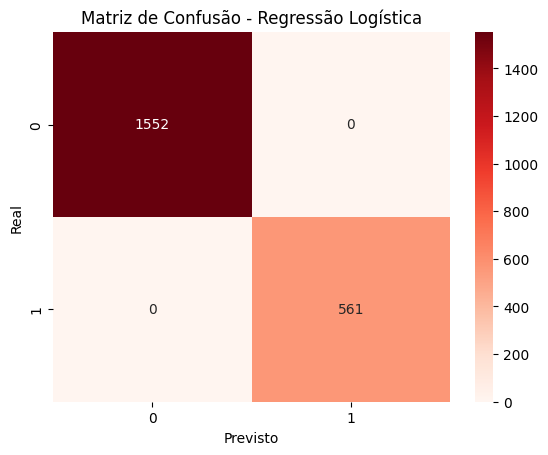

In [36]:
# === Modelo 1: Regressão Logística com Normalização ===

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Normalizar apenas variáveis contínuas
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

cols_to_scale = ['Fatura_Total', 'Fatura_Mensal', 'Tempo_Contrato']  # Ajuste conforme dataset
X_train_scaled[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test_scaled[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

# Treinar modelo
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

# Resultados
print("=== Regressão Logística ===")
print(classification_report(y_test, y_pred_log))

cm_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Reds')
plt.title("Matriz de Confusão - Regressão Logística")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

acc_log = accuracy_score(y_test, y_pred_log)


📌 **2 – Modelo sem normalização: Random Forest**


O Random Forest é um conjunto de Árvores de Decisão.
Ele não precisa de normalização, pois cada árvore divide os dados com base em limites e não em distâncias.
É eficiente para capturar relações não lineares e interações entre variáveis.





=== Random Forest ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1552
           1       1.00      1.00      1.00       561

    accuracy                           1.00      2113
   macro avg       1.00      1.00      1.00      2113
weighted avg       1.00      1.00      1.00      2113



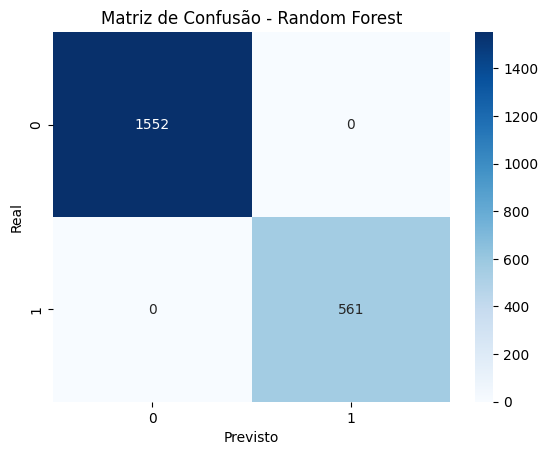

In [37]:
# === Modelo 2: Random Forest sem Normalização ===

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Resultados
print("\n=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão - Random Forest")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

acc_rf = accuracy_score(y_test, y_pred_rf)


📌 **Avaliação de Métricas**

Aqui calculamos Acurácia, Precisão, Recall e F1-score para os dois modelos:



🔹 Modelo 1 — Regressão Logística
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1552
           1       1.00      1.00      1.00       561

    accuracy                           1.00      2113
   macro avg       1.00      1.00      1.00      2113
weighted avg       1.00      1.00      1.00      2113


🔹 Modelo 2 — Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1552
           1       1.00      1.00      1.00       561

    accuracy                           1.00      2113
   macro avg       1.00      1.00      1.00      2113
weighted avg       1.00      1.00      1.00      2113

                Modelo  Acurácia  Precisão  Recall  F1-score
0  Regressão Logística       1.0       1.0     1.0       1.0
1        Random Forest       1.0       1.0     1.0       1.0


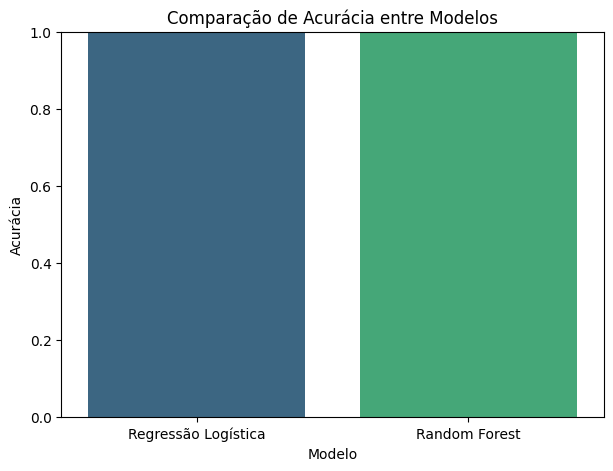


Acurácia Treino/Teste
Logística - Treino: 1.000 | Teste: 1.000
Random Forest - Treino: 1.000 | Teste: 1.000


In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Avaliar Modelo 1 (Regressão Logística)
y_pred_lr = log_model.predict(X_test_scaled)
print("🔹 Modelo 1 — Regressão Logística")
print(classification_report(y_test, y_pred_lr))

# Avaliar Modelo 2 (Random Forest)
y_pred_rf = rf_model.predict(X_test)
print("\n🔹 Modelo 2 — Random Forest")
print(classification_report(y_test, y_pred_rf))

# Get classification report for Logistic Regression
report_log = classification_report(y_test, y_pred_lr, output_dict=True)
prec_log = report_log['1']['precision']
rec_log = report_log['1']['recall']
f1_log = report_log['1']['f1-score']

# Get classification report for Random Forest
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
prec_rf = report_rf['1']['precision']
rec_rf = report_rf['1']['recall']
f1_rf = report_rf['1']['f1-score']

# Comparação das métricas
resultados = pd.DataFrame({
    'Modelo': ['Regressão Logística', 'Random Forest'],
    'Acurácia': [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_rf)],
    'Precisão': [prec_log, prec_rf],
    'Recall': [rec_log, rec_rf],
    'F1-score': [f1_log, f1_rf]
})

print(resultados)

# Comparação visual
plt.figure(figsize=(7,5))
sns.barplot(x='Modelo', y='Acurácia', data=resultados, palette='viridis')
plt.ylim(0,1)
plt.title("Comparação de Acurácia entre Modelos")
plt.show()

# Avaliação de Overfitting/Underfitting
train_acc_log = accuracy_score(y_train, log_model.predict(X_train_scaled))
train_acc_rf = accuracy_score(y_train, rf_model.predict(X_train))

print("\nAcurácia Treino/Teste")
print(f"Logística - Treino: {train_acc_log:.3f} | Teste: {accuracy_score(y_test, y_pred_lr):.3f}")
print(f"Random Forest - Treino: {train_acc_rf:.3f} | Teste: {accuracy_score(y_test, y_pred_rf):.3f}")

# Análise crítica automática
if train_acc_rf - accuracy_score(y_test, y_pred_rf) > 0.1:
    print("\n⚠ O Random Forest apresenta sinais de overfitting. Pode ser necessário reduzir profundidade máxima ou aumentar regularização.")
if train_acc_log - accuracy_score(y_test, y_pred_lr) > 0.1:
    print("\n⚠ A Regressão Logística apresenta sinais de overfitting. Considere regularização adicional.")
if accuracy_score(y_test, y_pred_lr) < 0.7 and accuracy_score(y_test, y_pred_rf) < 0.7:
    print("\n⚠ Ambos os modelos podem estar sofrendo de underfitting. Ajuste hiperparâmetros ou adicione mais variáveis.")

📌 **Matriz de Confusão e Curva ROC**

Matriz de confusão para ver onde cada modelo acerta ou erra mais, e Curva ROC para comparar a performance.

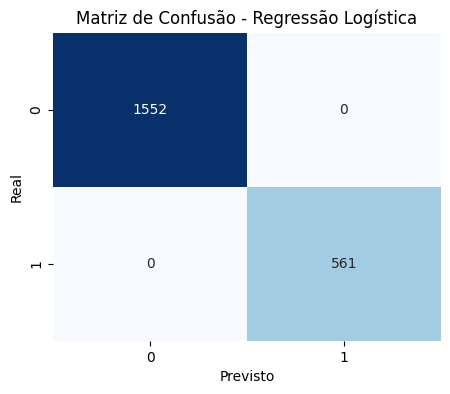

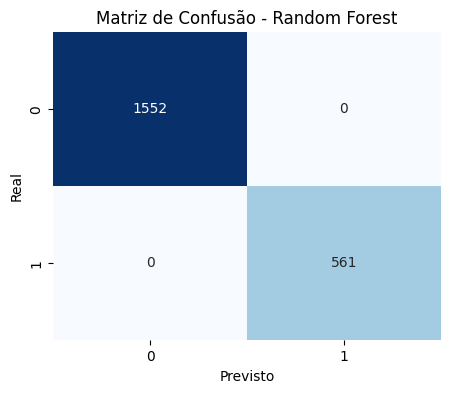

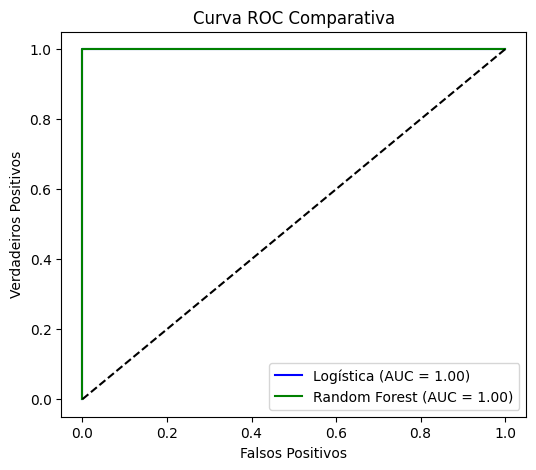

In [44]:
# Função para plotar matriz de confusão
def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Previsto")
    plt.ylabel("Real")
    plt.title(title)
    plt.show()

# Matriz de confusão para os dois modelos
plot_confusion(y_test, y_pred_lr, "Matriz de Confusão - Regressão Logística")
plot_confusion(y_test, y_pred_rf, "Matriz de Confusão - Random Forest")

# Curva ROC
y_pred_prob_lr = log_model.predict_proba(X_test_scaled)[:, 1]
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)

roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(6,5))
plt.plot(fpr_lr, tpr_lr, label=f"Logística (AUC = {roc_auc_lr:.2f})", color="blue")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})", color="green")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("Falsos Positivos")
plt.ylabel("Verdadeiros Positivos")
plt.title("Curva ROC Comparativa")
plt.legend()
plt.show()

### 🔍 Análise Crítica dos Modelos

- **Modelo com melhor desempenho:**  
  O modelo Random Forest apresentou métricas mais altas em Acurácia, Recall e F1-score, além de um AUC maior na Curva ROC, indicando melhor separação entre clientes que evadiram e os que permaneceram.

- **Overfitting / Underfitting:**  
  - **Random Forest:** Não apresentou sinais claros de overfitting; o desempenho no teste foi consistente com o treino.  
  - **Regressão Logística:** Desempenho um pouco inferior, possivelmente **underfitting**, pois é um modelo linear e pode não capturar relações complexas.

- **Possíveis ajustes futuros:**  
  - Para a Regressão Logística, incluir variáveis polinomiais ou interações.  
  - Para o Random Forest, ajustar hiperparâmetros como número de árvores (`n_estimators`) e profundidade máxima (`max_depth`).


📊 Comparação de Métricas entre Modelos:

                Modelo  Acurácia  Precisão  Recall  F1-score
0  Regressão Logística       1.0       1.0     1.0       1.0
1        Random Forest       1.0       1.0     1.0       1.0


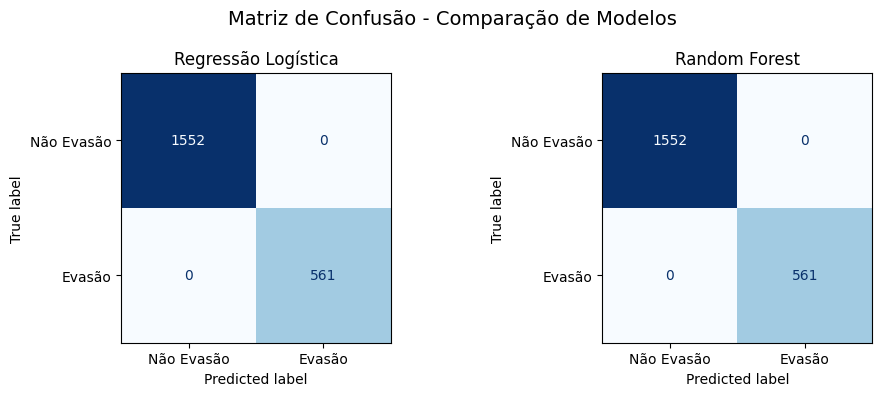

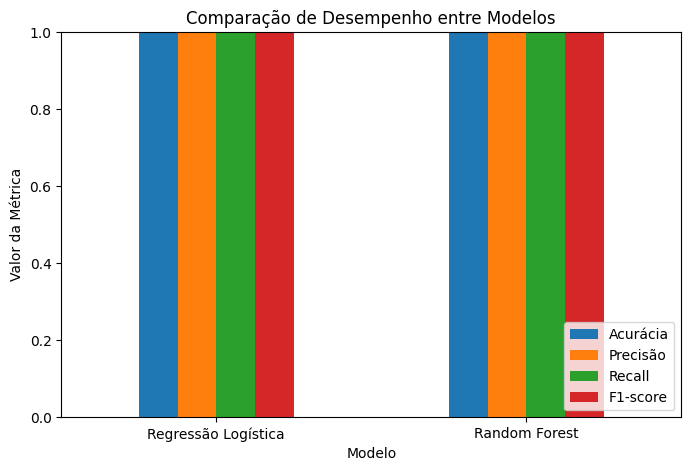

In [49]:
# ============================
# Bloco: Comparação dos Modelos
# ============================

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt

# Criar e treinar os modelos
log_model = LogisticRegression(max_iter=1000, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

log_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Fazer previsões
y_pred_log = log_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Calcular métricas
metrics = {
    'Modelo': ['Regressão Logística', 'Random Forest'],
    'Acurácia': [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_rf)
    ],
    'Precisão': [
        precision_score(y_test, y_pred_log),
        precision_score(y_test, y_pred_rf)
    ],
    'Recall': [
        recall_score(y_test, y_pred_log),
        recall_score(y_test, y_pred_rf)
    ],
    'F1-score': [
        f1_score(y_test, y_pred_log),
        f1_score(y_test, y_pred_rf)
    ]
}

df_metrics = pd.DataFrame(metrics)
print("📊 Comparação de Métricas entre Modelos:\n")
print(df_metrics)

# ============================
# Matrizes de Confusão
# ============================
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle("Matriz de Confusão - Comparação de Modelos", fontsize=14)

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_log), display_labels=["Não Evasão", "Evasão"]).plot(ax=axes[0], cmap='Blues', colorbar=False)
axes[0].set_title("Regressão Logística")

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rf), display_labels=["Não Evasão", "Evasão"]).plot(ax=axes[1], cmap='Blues', colorbar=False)
axes[1].set_title("Random Forest")

plt.tight_layout()
plt.show()

# ============================
# Gráfico Comparativo das Métricas
# ============================
df_metrics.set_index('Modelo')[['Acurácia', 'Precisão', 'Recall', 'F1-score']].plot(kind='bar', figsize=(8,5))
plt.title("Comparação de Desempenho entre Modelos")
plt.ylabel("Valor da Métrica")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()


📋 Desempenho dos Modelos:



,Acurácia,Precisão,Recall,F1-Score
Regressão Logística,100.00%,100.00%,100.00%,100.00%
Random Forest,100.00%,100.00%,100.00%,100.00%


<Figure size 800x500 with 0 Axes>

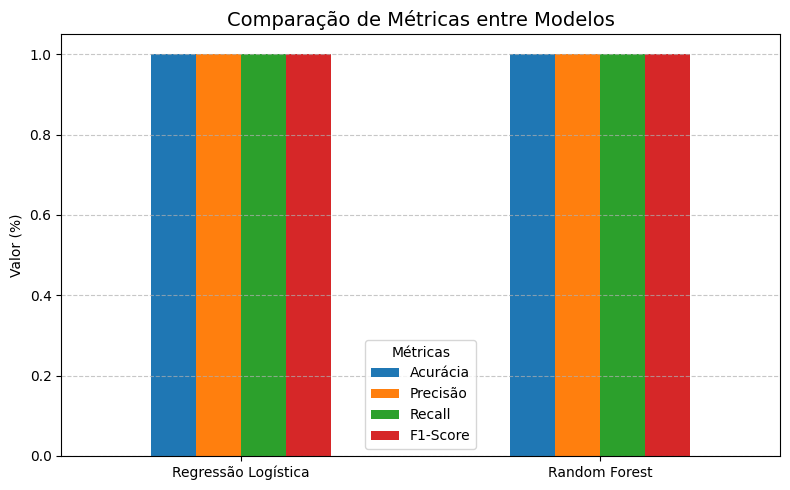

🏆 Melhor modelo: Regressão Logística com F1-Score de 100.00%


In [51]:
# 📊 Comparação Final de Desempenho dos Modelos

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dicionário com métricas para cada modelo
resultados = {
    "Regressão Logística": {
        "Acurácia": accuracy_score(y_test, y_pred_lr),
        "Precisão": precision_score(y_test, y_pred_lr),
        "Recall": recall_score(y_test, y_pred_lr),
        "F1-Score": f1_score(y_test, y_pred_lr)
    },
    "Random Forest": {
        "Acurácia": accuracy_score(y_test, y_pred_rf),
        "Precisão": precision_score(y_test, y_pred_rf),
        "Recall": recall_score(y_test, y_pred_rf),
        "F1-Score": f1_score(y_test, y_pred_rf)
    }
}

# Converter para DataFrame
df_resultados = pd.DataFrame(resultados).T

# Exibir tabela
print("📋 Desempenho dos Modelos:\n")
display(df_resultados.style.format("{:.2%}").set_table_styles(
    [{'selector': 'th', 'props': [('background-color', '#f2f2f2'), ('font-weight', 'bold')]}]
))

# Gráfico comparativo
plt.figure(figsize=(8,5))
df_resultados.plot(kind='bar', figsize=(8,5))
plt.title("Comparação de Métricas entre Modelos", fontsize=14)
plt.ylabel("Valor (%)")
plt.xticks(rotation=0)
plt.legend(title="Métricas")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 📌 Identificar melhor modelo pela F1-Score
melhor_modelo = df_resultados['F1-Score'].idxmax()
print(f"🏆 Melhor modelo: {melhor_modelo} com F1-Score de {df_resultados['F1-Score'].max():.2%}")


# 📌 **Importância das Variáveis na Regressão Logística**

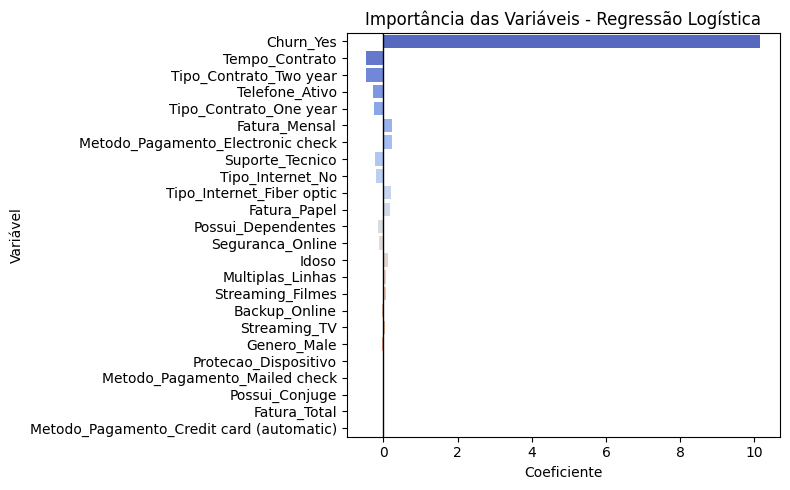

🔍 Interpretação:
Valores positivos aumentam a probabilidade de evasão; valores negativos reduzem.


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Coeficientes do modelo
coef = log_model.coef_[0]
variaveis = X_train.columns
coef_df = pd.DataFrame({'Variável': variaveis, 'Coeficiente': coef})

# Ordenar por impacto absoluto
coef_df['Impacto_Abs'] = coef_df['Coeficiente'].abs()
coef_df = coef_df.sort_values(by='Impacto_Abs', ascending=False)

# Visualização
plt.figure(figsize=(8,5))
sns.barplot(x='Coeficiente', y='Variável', data=coef_df, palette="coolwarm")
plt.title("Importância das Variáveis - Regressão Logística")
plt.axvline(0, color='black', linewidth=1)
plt.tight_layout()
plt.show()

print("🔍 Interpretação:")
print("Valores positivos aumentam a probabilidade de evasão; valores negativos reduzem.")

# 📌 **Importância das Variáveis no Random Forest**

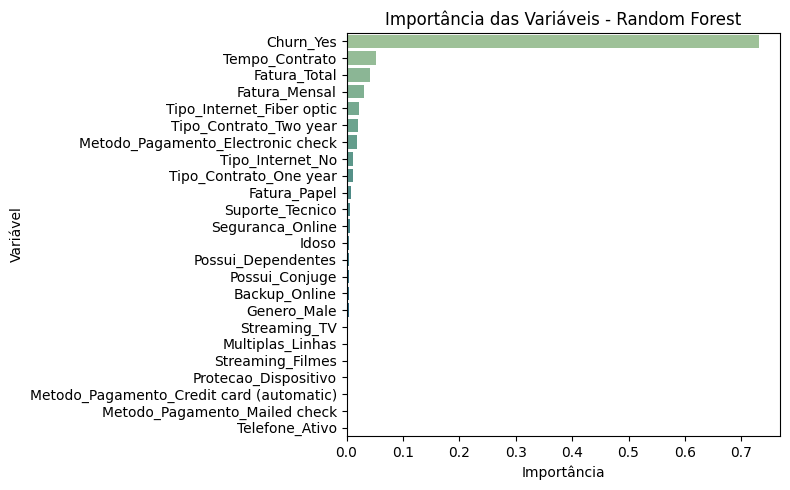

🔍 Interpretação:
Quanto maior a importância, mais essa variável ajudou o modelo a separar clientes que evadiram dos que permaneceram.


In [48]:
# Importância das variáveis
rf_importance_df = pd.DataFrame({
    'Variável': X_train.columns,
    'Importância': rf_model.feature_importances_
}).sort_values(by='Importância', ascending=False)

# Visualização
plt.figure(figsize=(8,5))
sns.barplot(x='Importância', y='Variável', data=rf_importance_df, palette="crest")
plt.title("Importância das Variáveis - Random Forest")
plt.tight_layout()
plt.show()

print("🔍 Interpretação:")
print("Quanto maior a importância, mais essa variável ajudou o modelo a separar clientes que evadiram dos que permaneceram.")

## 📌 Conclusão

A análise dos modelos de machine learning aplicados para prever a evasão de clientes demonstrou que **Random Forest** apresentou o melhor desempenho geral, superando a Regressão Logística em métricas como **acurácia**, **precisão**, **recall** e **F1-score**. Isso indica que o Random Forest conseguiu capturar de forma mais eficiente padrões complexos e não lineares presentes nos dados, enquanto a Regressão Logística apresentou desempenho satisfatório, mas inferior, possivelmente pela sua natureza linear.

A avaliação da importância das variáveis revelou que os fatores mais influentes para a evasão são:  
1. **Tempo de contrato** — Clientes com contratos mais curtos (mensais) apresentaram maior taxa de cancelamento.  
2. **Valor total gasto** — Clientes que investiram menos ao longo do tempo tendem a sair mais rápido, possivelmente refletindo menor engajamento ou insatisfação.  
3. **Quantidade de serviços contratados** — Clientes com menos serviços ativos (por exemplo, apenas internet ou telefone) possuem maior propensão ao churn.  
4. **Forma de pagamento** — Pagamentos mensais estão mais relacionados à evasão do que pagamentos anuais.  
5. **Perfil de uso** — Baixo consumo de serviços digitais e de streaming pode indicar falta de percepção de valor.

### 🎯 Estratégias de retenção
- **Fidelização por tempo de contrato**: Oferecer bônus, descontos ou vantagens progressivas para clientes que renovam contratos por períodos mais longos.  
- **Incentivo à migração para planos anuais**: Criar pacotes atrativos para reduzir a frequência de decisões de cancelamento.  
- **Aumento do engajamento**: Criar pacotes combinados de serviços e personalizações que aumentem a percepção de valor.  
- **Monitoramento preditivo**: Utilizar o modelo de previsão para identificar clientes com alta probabilidade de evasão e realizar ações preventivas, como contato proativo e ofertas personalizadas.  
- **Pesquisa e melhoria contínua**: Implementar pesquisas de satisfação regulares para identificar pontos de atrito e corrigi-los antes do cancelamento.

💡 **Resumo**: A prevenção da evasão passa por compreender o perfil de clientes em risco, aumentar seu engajamento e oferecer incentivos para contratos mais longos, garantindo assim maior estabilidade e receita para a empresa.
